In [528]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data

In [529]:
df = pd.read_csv(r'E:\AIO\Non_Linear\Data\Salaries.csv')
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [530]:
X = df.Level
X

0     1
1     2
2     3
3     4
4     5
5     6
6     7
7     8
8     9
9    10
Name: Level, dtype: int64

In [531]:
y = df.Salary
y

0      45000
1      50000
2      60000
3      80000
4     110000
5     150000
6     200000
7     300000
8     500000
9    1000000
Name: Salary, dtype: int64

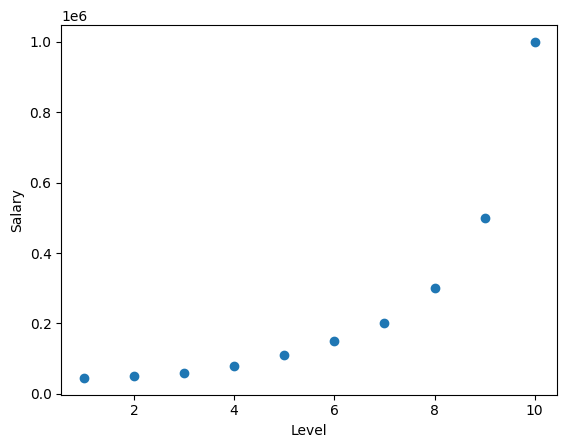

In [532]:
plt.scatter(X,y)
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

# Linear Regression

In [533]:
def r2score(y_pred, y):
    rss = np.sum((y_pred - y)**2)
    tss = np.sum((y- y.mean())**2)
    r2 = 1 - (rss/tss)
    return r2

In [534]:
X.shape

(10,)

In [535]:
class LinearRegression:
    def __init__(self, X_data, y_target, learning_rate=0.01, num_epochs = 100):
        self.X_data = X_data
        self.y_target = y_target
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.num_samples = self.X_data.shape[0]

        #Initial Coefficients
        self.theta = np.random.randn(self.X_data.shape[1])
        self.losses = []
    
    def compute_loss(self, y_pred, y_target):
        loss = (y_pred - y_target)*(y_pred - y_target)
        loss = np.mean(loss)
        return loss
    
    def predict(self, X_data):
        y_pred = X_data.dot(self.theta)
        return y_pred
    
    def fit(self):
        for epoch in range(self.num_epochs):
            #predict
            y_pred = self.predict(self.X_data)

            #compute loss
            loss = self.compute_loss(y_pred, self.y_target)
            self.losses.append(loss)

            #compute gradient
            k = 2*(y_pred - self.y_target)
            gradient = self.X_data.T.dot(k)/self.num_samples

            #update weights
            self.theta = self.theta - self.learning_rate*gradient

            print(f'Epoch: {epoch} - Loss: {loss}')

        return {
            'loss': sum(self.losses)/len(self.losses),
            'weight': self.theta
        }

In [536]:
X_linear = X.values.reshape(-1, 1)
X_linear.shape

(10, 1)

In [537]:
X_linear = X.values.reshape(-1, 1)
X_linear = np.hstack((np.ones((X_linear.shape[0], 1)), X_linear))
X_linear

array([[ 1.,  1.],
       [ 1.,  2.],
       [ 1.,  3.],
       [ 1.,  4.],
       [ 1.,  5.],
       [ 1.,  6.],
       [ 1.,  7.],
       [ 1.,  8.],
       [ 1.,  9.],
       [ 1., 10.]])

In [538]:
linear_model = LinearRegression(X_linear, y, learning_rate=0.01, num_epochs=100)
linear_model.fit()

Epoch: 0 - Loss: 142911618814.63153
Epoch: 1 - Loss: 40361205134.2025
Epoch: 2 - Loss: 35586200131.923874
Epoch: 3 - Loss: 35297857332.73277
Epoch: 4 - Loss: 35215949555.91012
Epoch: 5 - Loss: 35144088938.073715
Epoch: 6 - Loss: 35073260096.18069
Epoch: 7 - Loss: 35003044607.34171
Epoch: 8 - Loss: 34933418529.69971
Epoch: 9 - Loss: 34864376060.51813
Epoch: 10 - Loss: 34795912268.73785
Epoch: 11 - Loss: 34728022302.39149
Epoch: 12 - Loss: 34660701351.91075
Epoch: 13 - Loss: 34593944648.11795
Epoch: 14 - Loss: 34527747461.811646
Epoch: 15 - Loss: 34462105103.42808
Epoch: 16 - Loss: 34397012922.708786
Epoch: 17 - Loss: 34332466308.371265
Epoch: 18 - Loss: 34268460687.782135
Epoch: 19 - Loss: 34204991526.63329
Epoch: 20 - Loss: 34142054328.62069
Epoch: 21 - Loss: 34079644635.1258
Epoch: 22 - Loss: 34017758024.899742
Epoch: 23 - Loss: 33956390113.75007
Epoch: 24 - Loss: 33895536554.230213
Epoch: 25 - Loss: 33835193035.331482
Epoch: 26 - Loss: 33775355282.177605
Epoch: 27 - Loss: 33716019055

{'loss': 33803531036.043594,
 'weight': array([-62216.82784525,  61757.85970339])}

In [539]:
y_pred = linear_model.predict(X_linear)

In [540]:
r2score(y_pred, y)

0.6219614354052863

In [541]:
r2score(y_pred, y)

0.6219614354052863

In [542]:
linear_model.theta

array([-62216.82784525,  61757.85970339])

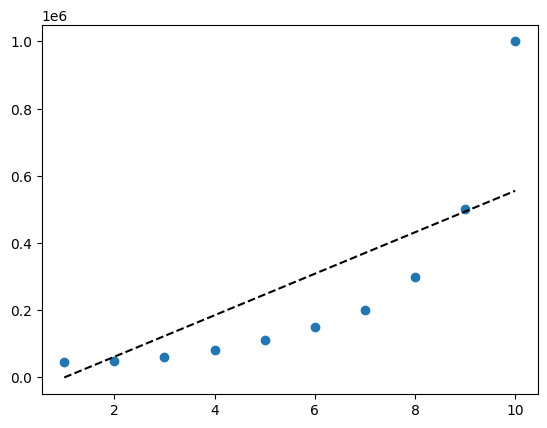

In [543]:
plt.scatter(X,y)
plt.plot(X, linear_model.theta[1]*X + linear_model.theta[0], '--k')
plt.show()

# Polymial Regression

In [544]:
def create_polynomial_features(X, degree=2):
    """Creates the polynomial features
    Args:
        X: Array tensor for the data.
        degree: A intege for the degree of
        the generated polynomial function.
    """
    X_new = X
    for d in range(2, degree+1):
        X_new = np.c_[X_new, np.power(X, d)]
    return X_new

# Polymial Regression with degree = 2

In [545]:
X_poly = create_polynomial_features(X, degree=2)
X_poly

array([[  1,   1],
       [  2,   4],
       [  3,   9],
       [  4,  16],
       [  5,  25],
       [  6,  36],
       [  7,  49],
       [  8,  64],
       [  9,  81],
       [ 10, 100]], dtype=int64)

In [546]:
X_poly = np.hstack((np.ones((X_poly.shape[0], 1)), X_poly))
X_poly

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

In [547]:
poly_model = LinearRegression(X_poly, y, learning_rate=0.00001, num_epochs=100)
poly_model.fit()

Epoch: 0 - Loss: 142895348729.65192
Epoch: 1 - Loss: 130145536953.07632
Epoch: 2 - Loss: 118672693424.1196
Epoch: 3 - Loss: 108348917414.81618
Epoch: 4 - Loss: 99059118693.39102
Epoch: 5 - Loss: 90699734429.03983
Epoch: 6 - Loss: 83177574611.11792
Epoch: 7 - Loss: 76408783110.77585
Epoch: 8 - Loss: 70317902802.33035
Epoch: 9 - Loss: 64837034321.78145
Epoch: 10 - Loss: 59905079083.80855
Epoch: 11 - Loss: 55467058117.94319
Epoch: 12 - Loss: 51473499129.893936
Epoch: 13 - Loss: 47879884954.613556
Epoch: 14 - Loss: 44646157252.13177
Epoch: 15 - Loss: 41736269913.05509
Epoch: 16 - Loss: 39117787194.829666
Epoch: 17 - Loss: 36761522108.54819
Epoch: 18 - Loss: 34641211024.818954
Epoch: 19 - Loss: 32733220871.00758
Epoch: 20 - Loss: 31016285655.509735
Epoch: 21 - Loss: 29471269381.668793
Epoch: 22 - Loss: 28080952708.16001
Epoch: 23 - Loss: 26829840977.402794
Epoch: 24 - Loss: 25703991471.785942
Epoch: 25 - Loss: 24690857971.854477
Epoch: 26 - Loss: 23779150883.49889
Epoch: 27 - Loss: 22958711

{'loss': 28289663733.22926,
 'weight': array([  57.38414776,  616.85089821, 6978.20081856])}

In [548]:
y_pred = poly_model.predict(X_poly)
r2score(y_pred, y)

0.8070952367791764

In [549]:
poly_model.theta

array([  57.38414776,  616.85089821, 6978.20081856])

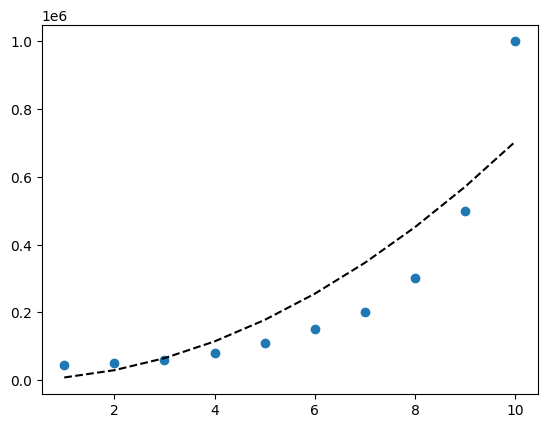

In [550]:
X_plot = df.Level
y_func = poly_model.theta[2]*X*X + poly_model.theta[1]*X + poly_model.theta[0]
plt.scatter(X_plot,y)
plt.plot(X, y_func, '--k')
plt.show()

# Ploymial Regression with degree = 3

In [551]:
X_poly = create_polynomial_features(X, degree=3)
X_poly

array([[   1,    1,    1],
       [   2,    4,    8],
       [   3,    9,   27],
       [   4,   16,   64],
       [   5,   25,  125],
       [   6,   36,  216],
       [   7,   49,  343],
       [   8,   64,  512],
       [   9,   81,  729],
       [  10,  100, 1000]], dtype=int64)

In [552]:
X_poly = np.hstack((np.ones((X_poly.shape[0], 1)), X_poly))
X_poly

array([[   1.,    1.,    1.,    1.],
       [   1.,    2.,    4.,    8.],
       [   1.,    3.,    9.,   27.],
       [   1.,    4.,   16.,   64.],
       [   1.,    5.,   25.,  125.],
       [   1.,    6.,   36.,  216.],
       [   1.,    7.,   49.,  343.],
       [   1.,    8.,   64.,  512.],
       [   1.,    9.,   81.,  729.],
       [   1.,   10.,  100., 1000.]])

In [553]:
poly_model = LinearRegression(X_poly, y, learning_rate=0.000001, num_epochs=100)
poly_model.fit()

Epoch: 0 - Loss: 143321104615.8239
Epoch: 1 - Loss: 55978135117.60185
Epoch: 2 - Loss: 24605405659.2053
Epoch: 3 - Loss: 13336437627.45606
Epoch: 4 - Loss: 9288471799.231592
Epoch: 5 - Loss: 7834193433.336046
Epoch: 6 - Loss: 7311532988.341418
Epoch: 7 - Loss: 7123497323.490291
Epoch: 8 - Loss: 7055654490.386075
Epoch: 9 - Loss: 7030983402.245898
Epoch: 10 - Loss: 7021819115.216278
Epoch: 11 - Loss: 7018224751.597078
Epoch: 12 - Loss: 7016631117.8482895
Epoch: 13 - Loss: 7015756207.380369
Epoch: 14 - Loss: 7015139540.553766
Epoch: 15 - Loss: 7014615719.217319
Epoch: 16 - Loss: 7014125334.542267
Epoch: 17 - Loss: 7013647047.646378
Epoch: 18 - Loss: 7013173193.862781
Epoch: 19 - Loss: 7012701020.119868
Epoch: 20 - Loss: 7012229537.525289
Epoch: 21 - Loss: 7011758390.85632
Epoch: 22 - Loss: 7011287452.495895
Epoch: 23 - Loss: 7010816676.579832
Epoch: 24 - Loss: 7010346046.608536
Epoch: 25 - Loss: 7009875556.629771
Epoch: 26 - Loss: 7009405204.479757
Epoch: 27 - Loss: 7008934989.355525
Epo

{'loss': 9125423040.091312,
 'weight': array([  1.97827774,  -2.38797348,  24.55632322, 826.06382936])}

In [554]:
y_pred = poly_model.predict(X_poly)
r2score(y_pred, y)

0.9135286264414068

In [555]:
poly_model.theta

array([  1.97827774,  -2.38797348,  24.55632322, 826.06382936])

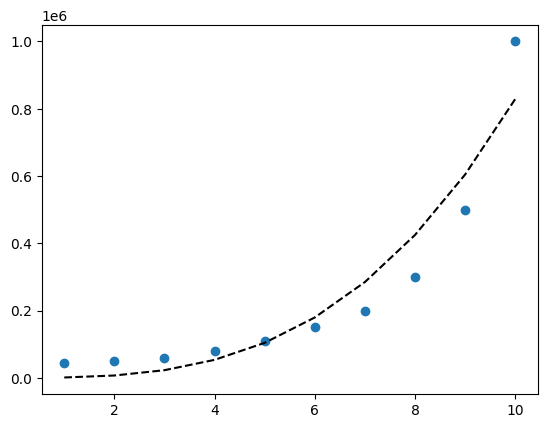

In [556]:
X_plot = df.Level
y_func = poly_model.theta[3]*X*X*X + poly_model.theta[2]*X*X + poly_model.theta[1]*X + poly_model.theta[0]
plt.scatter(X_plot,y)
plt.plot(X, y_func, '--k')
plt.show()

# Sklearn

In [557]:
from sklearn.preprocessing import PolynomialFeatures

In [558]:
poly_features = PolynomialFeatures(degree=2)

In [559]:
X.to_frame()

,Level
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [560]:
X_poly = poly_features.fit_transform(X.to_frame())
X_poly

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

In [561]:
poly_model = LinearRegression(X_poly, y, learning_rate=0.0001, num_epochs= 100)
poly_model.fit()

Epoch: 0 - Loss: 142877103079.8474
Epoch: 1 - Loss: 45660609807.253204
Epoch: 2 - Loss: 22695558029.06951
Epoch: 3 - Loss: 17267779157.450966
Epoch: 4 - Loss: 15982090417.092266
Epoch: 5 - Loss: 15674715872.734547
Epoch: 6 - Loss: 15598410908.196934
Epoch: 7 - Loss: 15576685614.585133
Epoch: 8 - Loss: 15567855261.537527
Epoch: 9 - Loss: 15562074428.871103
Epoch: 10 - Loss: 15557017746.33083
Epoch: 11 - Loss: 15552135986.131851
Epoch: 12 - Loss: 15547299423.30251
Epoch: 13 - Loss: 15542477414.233906
Epoch: 14 - Loss: 15537662717.109894
Epoch: 15 - Loss: 15532853617.331848
Epoch: 16 - Loss: 15528049705.765797
Epoch: 17 - Loss: 15523250881.616833
Epoch: 18 - Loss: 15518457116.92038
Epoch: 19 - Loss: 15513668400.917969
Epoch: 20 - Loss: 15508884726.919453
Epoch: 21 - Loss: 15504106089.200085
Epoch: 22 - Loss: 15499332482.267542
Epoch: 23 - Loss: 15494563900.688904
Epoch: 24 - Loss: 15489800339.049719
Epoch: 25 - Loss: 15485041791.944345
Epoch: 26 - Loss: 15480288253.973658
Epoch: 27 - Loss

{'loss': 17038309382.572344,
 'weight': array([ -357.61431866, -1251.3782914 ,  7244.03721915])}

In [562]:
y_pred = poly_model.predict(X_poly)
r2score(y_pred, y)

0.8122782962470791

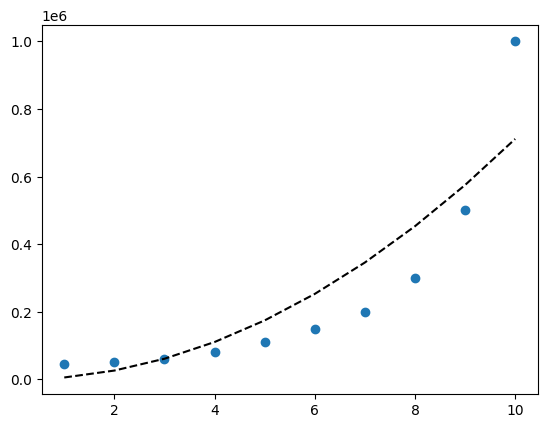

In [563]:
X_plot = df.Level
y_func = poly_model.theta[2]*X*X + poly_model.theta[1]*X + poly_model.theta[0]
plt.scatter(X_plot,y)
plt.plot(X, y_func, '--k')
plt.show()

# Curve Fit from Scipy

In [564]:
from scipy import optimize

In [565]:
def func(x, a, b):
    #y = a*x + b
    y = a*np.exp(b*X)
    return y

In [566]:
X

0     1
1     2
2     3
3     4
4     5
5     6
6     7
7     8
8     9
9    10
Name: Level, dtype: int64

In [567]:
y

0      45000
1      50000
2      60000
3      80000
4     110000
5     150000
6     200000
7     300000
8     500000
9    1000000
Name: Salary, dtype: int64

In [568]:
optimize.curve_fit(func, xdata = X, ydata = y)

(array([4.58939085e+03, 5.34689945e-01]),
 array([[ 3.29357041e+06, -7.50606612e+01],
        [-7.50606612e+01,  1.72574611e-03]]))

In [569]:
alpha, beta = optimize.curve_fit(func, xdata = X, ydata = y)[0]
print(f'alpha={alpha}, beta={beta}')

alpha=4589.390851556285, beta=0.5346899447541074


In [570]:
y_pred = func(X, alpha, beta)

In [571]:
r2score(y_pred, y)

0.9808034598161927

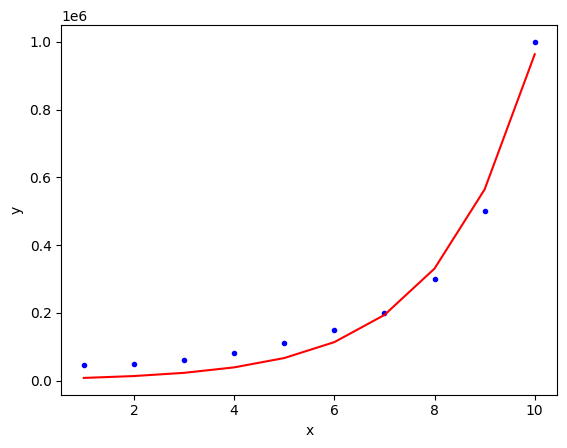

In [572]:
plt.plot(X, y, 'b.')
plt.plot(X, alpha*np.exp(beta*X), 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()